**<h1><center>PROJECT DATA ANALYSIS</center></h1>**

Thành viên:

|STT|MSSV|Họ tên|
|---|---|---|
|1|20078291|Trần Minh Long|
|2|20020541|Quách Xuân Nam|
|3|20016701|Nguyễn Trần Lâm|

# 0. Chọn nguồn dữ liệu

Link: https://catalog.data.gov/dataset/local-weather-archive

# 1. Thuyết minh dữ liệu

Bộ dữ liệu này chứa dữ liệu thời tiết sân bay quốc tế `Raleigh Durham` được lấy từ dịch vụ web `NOAA` được mô tả tại dữ liệu khí hậu trực tuyến: Tài liệu dịch vụ web. 

Chúng tôi đã rút dữ liệu này và chuyển đổi nó thành các đơn vị thường được sử dụng. 

Bộ dữ liệu này là một kho lưu trữ - nó không được cập nhật.

Thông tin thuộc tính

|Thuộc tính|Mô tả|Đơn vị|
|---|---|---|
|date|Thời gian|năm-tháng-ngày|
|tmin|Nhiệt độ thấp nhất|$^oF$|
|tmax|Nhiệt độ cao nhất|$^oF$|
|prcp|Lượng mưa|inch|
|snow|Lượng tuyết rơi|inch|
|snwd|Độ sâu tuyết|inch|
|awnd|Tốc độ gió trung bình|m/h|

# 2. Đặt câu hỏi tình huống, vấn đề tìm hiểu trên bộ dữ liệu

1. Tốc độ gió trung bình hằng năm có thay đổi nhiều hay không?
2. Tuyết thường rơi vào tháng nào trong năm và năm nào có lượng tuyết rơi nhiều nhất ?
3. Mưa nhiều nhất vào tháng nào trong năm ?
4. Từ năm 2017 tới 2022 những năm nào có lượng mưa lớn ?
5. Có xuất hiện nhiệt tháng nào có nhiệt độ quá cao hay không ?
6. Nhiệt độ thay đổi như thế nào trong năm ?
7. Tổng nhiệt độ cao nhất và thấp nhất, tổng quan nhiệt độ từ năm 2017 tới 2022 ?

# 3. Thực hiện các vấn đề

In [14]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = 'plotly_dark'
import matplotlib.pyplot as plt 
import seaborn as sns 

Đọc dữ liệu

In [15]:
df = pd.read_csv('weather-history.csv', parse_dates =["date"], index_col ="date") # , index_col ="date"
df.head()

,tmin,tmax,prcp,snow,snwd,awnd
date,,,,,,
2017-01-09,9,31,0.00,0.0,1.2,2.46
2017-01-11,40,57,0.00,0.0,0.0,6.04
2017-01-19,36,63,0.00,0.0,0.0,1.34
2017-01-20,46,59,0.09,0.0,0.0,2.91
2017-01-24,41,63,0.00,0.0,0.0,6.04


In [16]:
ele = {'tmin': 'Nhiệt độ thấp nhất', 'tmax': 'Nhiệt độ cao nhất', 'prcp': 'Lượng mưa', 'snwd': 'Lượng tuyết rơi', 'awnd': 'Tốc độ gió trung bình'}

Xem số lượng dòng, cột của tập dữ liệu

In [17]:
df.shape

(1977, 6)

Xem kiểu dữ liệu các trường dữ liệu

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1977 entries, 2017-01-09 to 2022-05-22
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmin    1977 non-null   int64  
 1   tmax    1977 non-null   int64  
 2   prcp    1977 non-null   float64
 3   snow    1977 non-null   float64
 4   snwd    1976 non-null   float64
 5   awnd    1973 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 108.1 KB


Kiểm tra dữ liệu `NaN`

In [19]:
df.isna().sum()

tmin    0
tmax    0
prcp    0
snow    0
snwd    1
awnd    4
dtype: int64

Điền dữ liệu `NaN` bằng những giá trị phía dưới (tức ngày hôm sau)

In [20]:
df.fillna(method='bfill', inplace=True)
df.isna().sum()

tmin    0
tmax    0
prcp    0
snow    0
snwd    0
awnd    0
dtype: int64

Xem thống kê tổng quan

In [21]:
df.describe()

,tmin,tmax,prcp,snow,snwd,awnd
count,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000
mean,51.088012,72.298938,0.135771,0.012838,0.016945,6.075488
std,15.889527,15.796087,0.370521,0.227433,0.215284,2.952269
min,4.000000,27.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,60.000000,0.000000,0.000000,0.000000,3.800000
50%,52.000000,74.000000,0.000000,0.000000,0.000000,5.800000
75%,66.000000,86.000000,0.060000,0.000000,0.000000,7.800000
max,78.000000,102.000000,4.960000,7.000000,5.900000,20.360000


## Trực quan

### Tổng quan

In [22]:
yearly = df.resample('Y').sum()

## Tổng nhiệt độ cao nhất và thấp nhất, tổng quan nhiệt độ từ năm 2017 tới 2022 ?

### Tổng quan

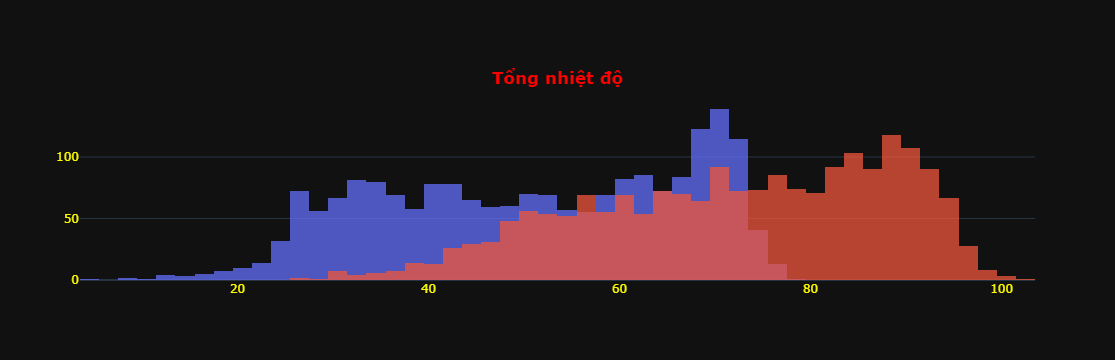

In [23]:
fig = go.Figure()
fig.add_trace(go.Histogram(x = df['tmin'], name = ele['tmin']))
fig.add_trace(go.Histogram(x = df['tmax'], name = ele['tmax']))
fig.update_traces(opacity=0.75)
fig.update_layout(
    barmode='overlay',
    title={
        'text': f'<b>Tổng nhiệt độ</b>',
        'y':0.8,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_color="red",
    font_color="yellow",
    hovermode="x unified",
    hoverlabel=dict(
        bgcolor="gray",
        font_size=16,
        font_family="Rockwell"),
    showlegend = False
)
fig.show()

> Nhận xét: Nhìn chung nhiệt độ ở sân bay quốc tế Raleigh Durham đây nóng

## Nhiệt độ thay đổi như thế nào trong năm ?

In [24]:
df.index.year.unique()

Int64Index([2017, 2018, 2019, 2020, 2021, 2022], dtype='int64', name='date')

In [25]:
yearly.resample('M').sum()

,tmin,tmax,prcp,snow,snwd,awnd
date,,,,,,
2017-12-31,18926,26864,45.54,1.10,3.6,2282.39
2018-01-31,0,0,0.00,0.00,0.0,0.00
2018-02-28,0,0,0.00,0.00,0.0,0.00
2018-03-31,0,0,0.00,0.00,0.0,0.00
2018-04-30,0,0,0.00,0.00,0.0,0.00
...,...,...,...,...,...,...
2022-08-31,0,0,0.00,0.00,0.0,0.00
2022-09-30,0,0,0.00,0.00,0.0,0.00
2022-10-31,0,0,0.00,0.00,0.0,0.00


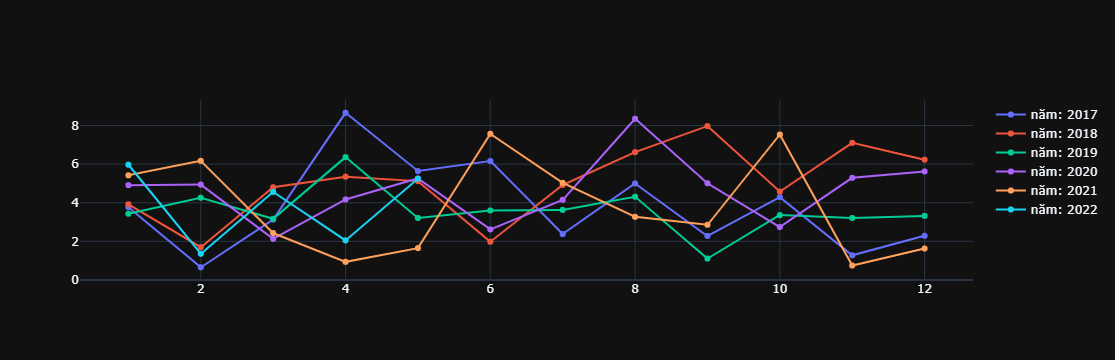

In [26]:
fig = go.Figure()
for y in df.index.year.unique():
    year = df[df.index.year == y]
    monthly = year.resample('M').sum()
    y_m = monthly.prcp.max()
    x_m = monthly.loc[monthly.prcp == y_m].index.month[0]
    fig.add_trace(go.Scatter(x=monthly.index.month, y=monthly['prcp'],
        name=f'năm: {y}',
        connectgaps=True)
    )
fig.show()

> Không có đặc trưng nên ko đưa lên dashboard

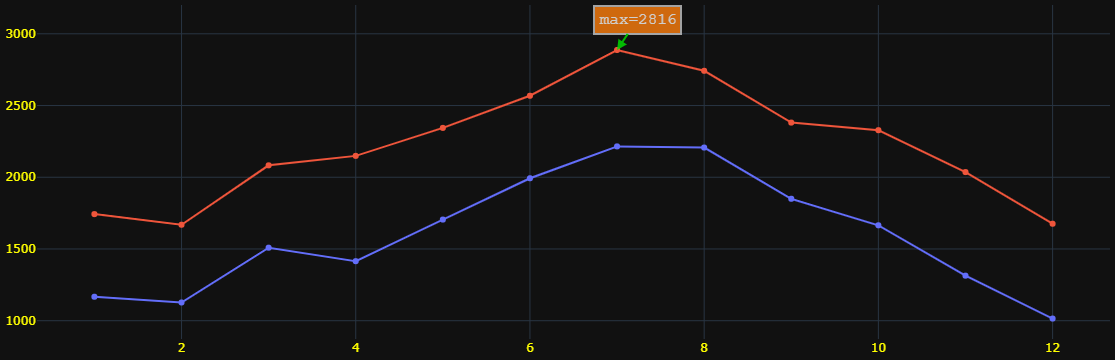

In [27]:
y = 2020
year = df[df.index.year == y]
monthly = year.resample('M').sum()
y_m = monthly.tmax.max()
x_m = monthly.loc[monthly.tmax == y_m].index.month[0]
fig = go.Figure()
fig.add_trace(go.Scatter(x=monthly.index.month, y=monthly['tmin'],
    name=ele['tmin'],
    connectgaps=True)
)

fig.add_trace(go.Scatter(x=monthly.index.month, y=monthly['tmax'],
    name=ele['tmax'],
    connectgaps=True,)
)
fig.update_layout(
    barmode='overlay',
    title_font_color="red",
    font_color="yellow",
    hovermode="x unified",
    hoverlabel=dict(
        bgcolor="gray",
        font_size=16,
        font_family="Rockwell"),
    showlegend = False
)
fig.add_annotation(
        x=x_m,
        y=y_m,
        xref="x",
        yref="y",
        text="max=2816",
        showarrow=True,
        font=dict(
            family="Courier New, monospace",
            size=16,
            color="#ffffff"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#00e600",
        ax=20,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ff7f0e",
        opacity=0.8
        )
fig.update_layout(yaxis_title=None, xaxis_title=None, margin=dict(l=5, r=5, t=5, b=5))
fig.show()

> Nhận xét: năm $2020$ nhiệt độ có sự biến động lạnh vào đầu năm và cuối năm và cao lên vào giữa năm. Nhiệt độ cao nhất rơi vào tháng $7$.

## Có xuất hiện nhiệt tháng nào có nhiệt độ quá cao hay không ?

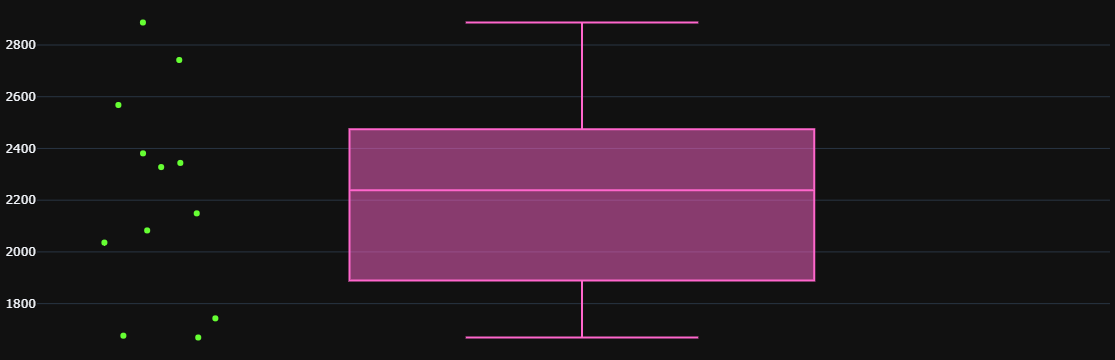

In [28]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=monthly.tmax,
    name='',
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all',
    marker_color='#66ff33',
    line_color='#ff66cc'
))
fig.update_layout(yaxis_title=None, xaxis_title=None, margin=dict(l=5, r=5, t=5, b=5))
fig.show()

> Nhận xet: qua boxplot ta thấy không xuất hiện điểm *outliert* cho thấy không có nhiệt độ nào là quá cao

## Từ năm 2017 tới 2022 những năm nào có lượng mưa lớn ?

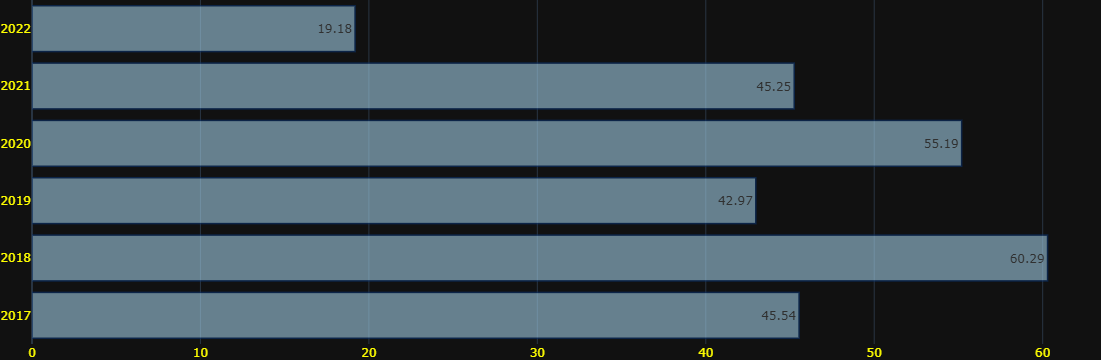

In [34]:
yearly = df.resample('Y').sum()
fig = go.Figure()
fig.add_trace(go.Bar(y = yearly.index.year, x=yearly.prcp, text = yearly.prcp, textposition='auto', orientation='h'))
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6,
                  )
fig.update_layout(
    title={
        # 'text': f'<b>Tổng lượng mưa của từng năm</b>',
        # 'y':0.8,
        # 'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_color="red",
    font_color="yellow",
    hovermode="x unified",
    hoverlabel=dict(
        bgcolor="gray",
        font_size=16,
        font_family="Rockwell")
)
fig.update_layout(yaxis_title=None, xaxis_title=None, margin=dict(l=0, r=0, t=0, b=0),
    height=300, width=960)
fig.show()

> Nhận xét: năm $2020$ và năm $2018$ có lượng mưa lớn nhất. Thấp nhất là vào năm $2022$

## Mưa nhiều nhất vào tháng nào trong năm ?

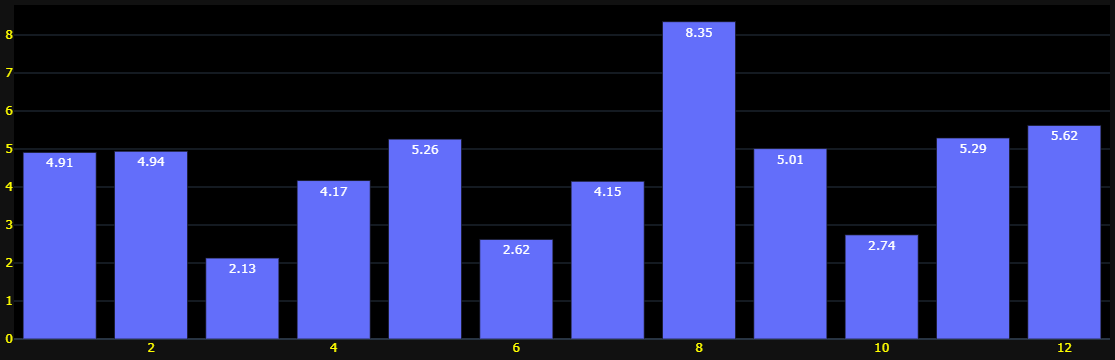

In [30]:
year = df[df.index.year == 2020]
monthly = year.resample('M').sum()
fig = px.bar(x = monthly.index.month, y=monthly['prcp'],
            text_auto=True,
            labels={
                "x": "",
                "y": ""
                })
fig.update_layout(
    barmode='overlay',
    title_font_color="red",
    font_color="yellow",
    showlegend = False,
    plot_bgcolor='black'
)
fig.update_layout(yaxis_title=None, xaxis_title=None, margin=dict(l=5, r=5, t=5, b=5))
fig.show()

> Nhận xet: năm $2020$ có lượng mưa lớn nhất vào tháng $8$

## Tuyết thường rơi vào tháng nào trong năm và năm nào có lượng tuyết rơi nhiều nhất ?

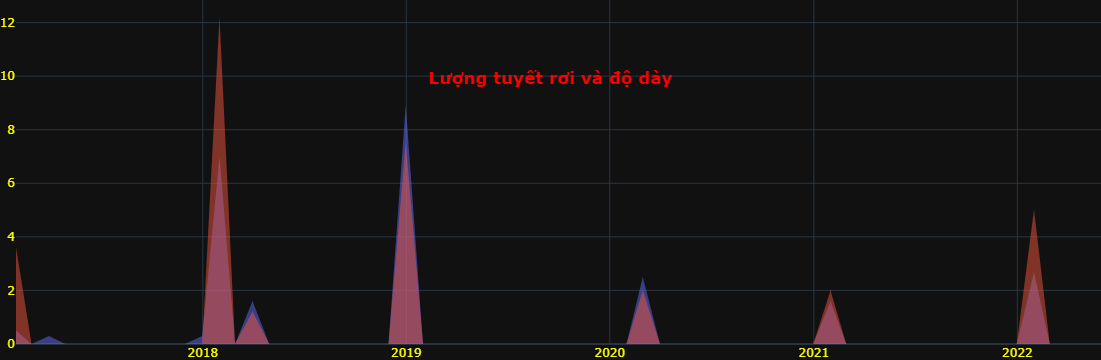

In [31]:
fig = go.Figure()
m = df.resample('M').sum()
fig.add_trace(go.Scatter(x=m.index, y=m.snow, fill='tozeroy', mode='none',
                        name = 'Lượng tuyết rơi'))
fig.add_trace(go.Scatter(x=m.index, y=m.snwd, fill='tozeroy', mode='none',
                        name = 'Độ dày tuyết'))

fig.update_layout(
    barmode='overlay',
    title={
        'text': f'<b>Lượng tuyết rơi và độ dày</b>',
        'y':0.8,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_color="red",
    font_color="yellow",
    hovermode="x unified",
    hoverlabel=dict(
        bgcolor="gray",
        font_size=16,
        font_family="Rockwell"),
    showlegend = False
)
fig.update_layout(yaxis_title=None, xaxis_title=None, margin=dict(l=0, r=0, t=0, b=0),
    height=300, width=1960)
fig.show()

> Nhận xét: - vào năm 2018 có tuyết rơi nhiều hơn hẵn những năm còn lại, năm tuyết rơi ít nhất là năm 2021. Tuyết rơi nhiều nhất là vào tháng 1 hằng năm

## Tốc độ gió trung bình hằng năm có thay đổi nhiều hay không ?

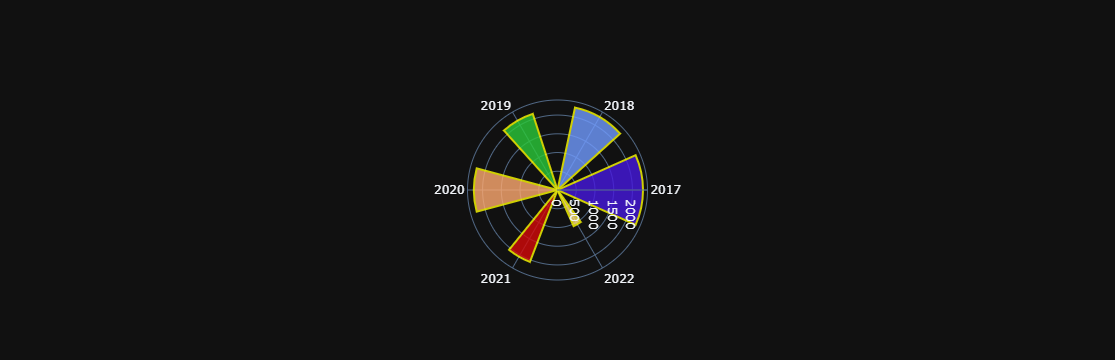

In [32]:
fig = go.Figure(go.Barpolar(
    r=yearly.awnd,
    theta=list(map(lambda x: str(x), yearly.index.year.values)),
    width=[0.8, 0.6, 0.4, 0.5, 0.3, 0.2],
    marker_color=["#4618DF", '#709BFF', '#2AC93A', '#FFAA70', '#D50909', '#FFDF70'],
    marker_line_color="yellow",
    marker_line_width=2,
    opacity=0.8
))

fig.update_layout(
    
)
fig.show()

> nhận xét: tốc độ gió trung bình hằng năm không có thay đổi nhiều.